# The irreducible mass of a Black Hole

Consider a rotating black hole. In 1969, Roger Penrose discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

A rotating black-hole, namely a Kerr BH, has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy. But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344).


For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Suppose we have repeated measurments of $M$ and $\chi$.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

In [1]:
import numpy as np
from scipy import stats, interpolate
import scipy.stats
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy import optimize
plt.rcParams['figure.figsize'] = [4, 4]

#### Let's start generating the data from a Normal distribution  $\mathcal{N}(\mu = 1, \sigma = 0.02)$

Text(0, 0.5, '$p(x)$')

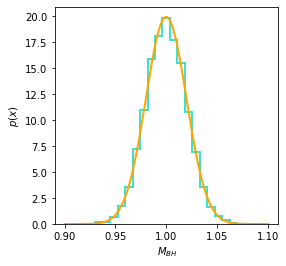

In [2]:
N = 10000 #number of BHs
μ = 1
σ = 0.02

χ = np.random.uniform(0.0, 1.0, N)
M = np.random.normal(μ, σ, N)

plt.hist(M, bins = 20, density = True, histtype='step', linewidth = 2, color = 'turquoise');
x = np.linspace(μ-5*σ, μ+5*σ, N)
Mass = scipy.stats.norm.pdf(x, μ, σ)
plt.plot(x,Mass,lw=2, color = 'orange')
plt.xlabel(" $M_{BH}$")
plt.ylabel('$p(x)$')

Now we compute and plot the distribution of $f = M_{irr}/M$

Text(0, 0.5, '$p(x)$')

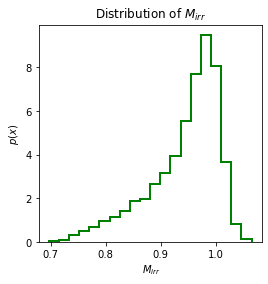

In [3]:
def M_irreducible(M,χ):
    return M * ((1+(1- χ**2)**0.5)/2)**0.5

Mirr = M_irreducible(M,χ)
f = Mirr/M

plt.hist(Mirr, bins = 20, density=True, histtype='step', linewidth = 2, color = 'green');
plt.title("Distribution of $M_{irr}$")
plt.xlabel(" $M_{irr}$")
plt.ylabel('$p(x)$')

The law to transform probability distribution is : 
$$ p(y) = \left|\frac{dx}{dy}\right| p(x) ,$$
since $p(x) = 1 $ and $ y = f = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}  $, then

$$ \left|\frac{dx}{df}\right| = 2\sqrt{2}\frac{\sqrt{1-x^2}\sqrt{1+\sqrt{1-x^2}}}{x} = 2 \frac{2f^2-1}{\sqrt{1-f^2}}, $$

$$p(y) =   2 \frac{2f^2-1}{\sqrt{1-f^2}} .$$


Text(0, 0.5, '$p(x)$')

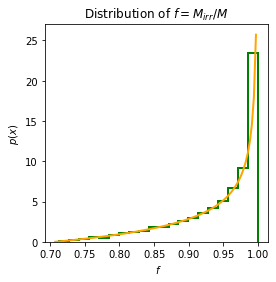

In [4]:
plt.hist(f, bins = 20, density=True, histtype='step', linewidth = 2, color = 'green');
x_f = np.linspace(1/2**0.5,1,100)[:-1]
pdff = 2*(2*x_f**2-1)/(1 - x_f**2)**0.5
plt.plot(x_f,pdff,lw=2, color = 'orange');

plt.title("Distribution of $f = M_{irr}/M$")
plt.xlabel(" $f$")
plt.ylabel('$p(x)$')

## Scott's rule

Let's plot an histoghram of $M_{irr}$, to choose the bin sizes we refer to the **Scott's rule**, evaluating numerically an estimate for the $\sigma$ .

Text(0, 0.5, '$p(x)$')

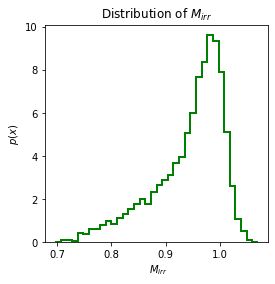

In [5]:
from astropy.visualization.hist import hist as fancyhist
_,_,_ = fancyhist(Mirr, bins="scott", histtype="step",density=True, lw = 2, color = 'green') #scott directly
plt.title("Distribution of $M_{irr}$")
plt.xlabel(" $M_{irr}$")
plt.ylabel('$p(x)$')

## Plot of the distribution of  $M_{irr}$ using a KDE ( Kernel Density Estimation).

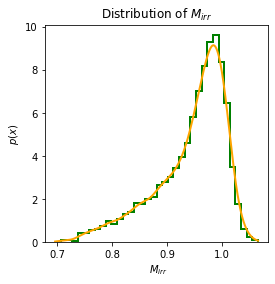

In [6]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(Mirr.min(),Mirr.max(),1000)  

def kde_sklearn(data, bandwidth,  kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

PDF = kde_sklearn(Mirr,bandwidth=0.01, kernel="gaussian") 

plt.hist(Mirr, bins="scott", density=True, histtype="step", lw = 2, color = 'green') 
plt.plot(xgrid,PDF, color = 'orange', lw = 2) 
plt.title("Distribution of $M_{irr}$")
plt.xlabel(" $M_{irr}$")
plt.ylabel('$p(x)$')
plt.show()



#### Large bandwidth=0.1 

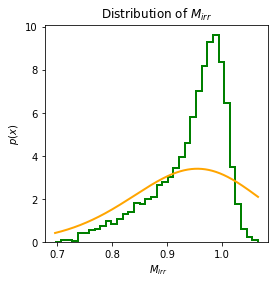

In [7]:
PDF2 = kde_sklearn(Mirr,bandwidth=0.1,kernel="gaussian")  
plt.hist(Mirr, bins="scott", density=True, histtype="step", lw = 2, color = 'green') 
plt.plot(xgrid,PDF2, color = 'orange', lw = 2) 
plt.title("Distribution of $M_{irr}$")
plt.xlabel(" $M_{irr}$")
plt.ylabel('$p(x)$')
plt.show()

That's very different from the dataset

#### Small bandwidth 

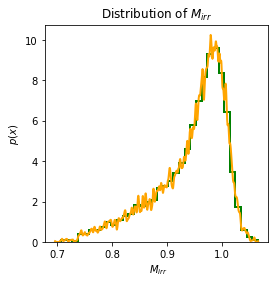

In [8]:
PDF3 = kde_sklearn(Mirr,bandwidth=0.001,kernel="gaussian") 
plt.hist(Mirr, bins = 'scott', density=True, histtype="step", lw = 2, color = 'green') 
plt.plot(xgrid,PDF3, color = 'orange', lw = 2) 
plt.title("Distribution of $M_{irr}$")
plt.xlabel(" $M_{irr}$")
plt.ylabel('$p(x)$')
plt.show()

I don't believe that the physical process that determine my dataset gives arise to such "up and down" patterns $\rightarrow $ bandwidth is too small.

## Compute the KS distance between $M_{irr}$ and f as a function of $\sigma$ . Discuss the limits at large and small values of $\sigma$.

In [9]:
print(stats.kstest(Mirr, f))
kstest = stats.kstest(Mirr, f).statistic
print("KS test between Mirr and f : %.3f" % kstest)

KstestResult(statistic=0.159, pvalue=1.1097946158941226e-110, statistic_location=0.9999999843261412, statistic_sign=-1)
KS test between Mirr and f : 0.159


In [10]:
print(stats.kstest(Mirr, M))
kstest = stats.kstest(Mirr, M).statistic
print("KS test between Mirr and M : %.3f" % kstest)

KstestResult(statistic=0.4998, pvalue=0.0, statistic_location=0.9741324256551869, statistic_sign=1)
KS test between Mirr and M : 0.500


## kstest in function of $\sigma$

If we are in the limit $\sigma \ll \mu M_{irr} $ should be distributed as $f$. In the opposite limit $\sigma \gg \mu M_{irr} $ should be distributed as $M$.

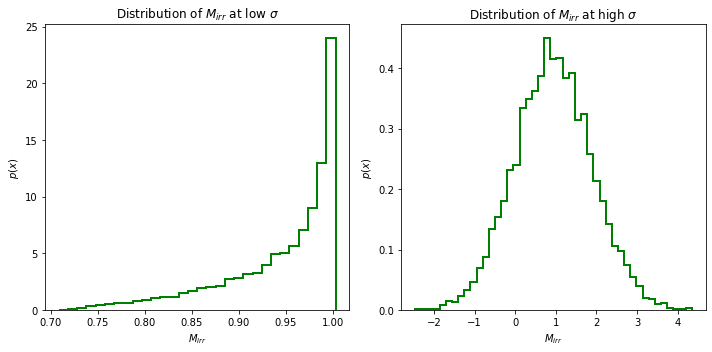

In [11]:
χ = np.random.uniform(0.0, 1.0, N)

def M_function(μ, σ, N): 
    return np.random.normal(μ, σ, N)
    

def M_irreducible(M,χ):
    return M * ((1+(1- χ**2)**0.5)/2)**0.5

Mirr_low = M_irreducible(M_function(1,0.001,10000),χ)
Mirr_high = M_irreducible(M_function(1,1,10000),χ)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.hist(Mirr_low, bins = "scott", density=True, histtype='step', linewidth = 2, color = 'green');
ax1.set_xlabel('$M_{irr}$')
ax1.set_ylabel(r'$p(x)$')
ax1.set_title('Distribution of $M_{irr}$ at low $\sigma$')


ax2.hist(Mirr_high, bins = "scott", density=True, histtype='step', linewidth = 2, color = 'green');
ax2.set_xlabel('$M_{irr}$')
ax2.set_ylabel(r'$p(x)$')
ax2.set_title('Distribution of $M_{irr}$ at high $\sigma$')

fig.tight_layout() 
plt.show()



As expected they are distributed as $f$ amd as $M$.

#### Let's analyze the evolution of the KS test in function of $\sigma$

In [12]:
N = 10000 #number of BHs
μ = 1
σ = np.arange(0.001, 10, 0.01)
M = [np.random.normal(μ, sig, N) for sig in σ]
χ = np.random.uniform(0.0, 1.0, N)
Mirr = M_irreducible(M,χ)
f = Mirr/M
kstest_Mirr_f = [stats.kstest(a, b).statistic for a, b in zip(Mirr, f)]
kstest_Mirr_M = [stats.kstest(a, b).statistic for a, b in zip(Mirr, M)]

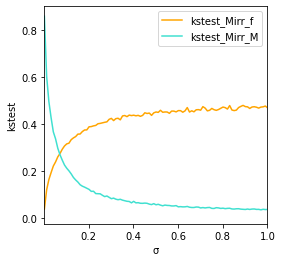

In [13]:
plt.plot(σ, kstest_Mirr_f, color='orange', label='kstest_Mirr_f')
plt.plot(σ, kstest_Mirr_M, color='turquoise', label='kstest_Mirr_M')
plt.xlabel("σ")
plt.ylabel("kstest")
plt.legend()
plt.xlim(0.0001, 1)
plt.show()


## $mu$ not equal to 1

In [14]:
# Generating the mass and the spin
N = 10000 #number of BHs
μ = 3
σ = np.arange(0.001, 10, 0.01)

M = [np.random.normal(μ, sig, N) for sig in σ]
χ = np.random.uniform(0.0, 1.0, N)
Mirr = M_irreducible(M,χ)
f = Mirr/M
kstest_Mirr_f = [stats.kstest(a, b).statistic for a, b in zip(Mirr, f)]
kstest_Mirr_M = [stats.kstest(a, b).statistic for a, b in zip(Mirr, M)]

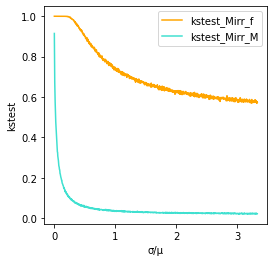

In [15]:
a = σ/μ
plt.plot(a, kstest_Mirr_f, color='orange', label='kstest_Mirr_f')
plt.plot(a, kstest_Mirr_M, color='turquoise', label='kstest_Mirr_M')
plt.xlabel("σ/μ")
plt.ylabel("kstest")
plt.legend()
#plt.xlim(0.00001, 0.05)
plt.show()
